In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [69]:
df = pd.read_csv(r'C:\Users\Lee seohyun\Downloads\kobert연습용.csv',encoding='CP949')
df

,text,code
0,쓰레기 영화 돈OO하지마세요,0
1,이세상의 모든짐은 여자가 혼자 다 짊어지고 산다 남자는 이세상의 모든 혜택을 받으...,101
2,평점9 6 실화냐,0
3,아니 90년대생 여자들이 이걸보고 왜 공감을해 60 70이면 모를까 니들은 왜...,0
4,와 이런 영화가 허허참,0
...,...,...
1394,전라도에서 예매율 1위,10
1395,82Kg 김치영 82kg,100
1396,개똥철학 0점을 못줘서 아쉽다,0
1397,같은세대를 살아가는 기혼 직장인입니다만 영확적재미를 위한 비약이 너무 심해서 공감가...,0


In [70]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','것']

## 데이터 정제

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
train_data, test_data = train_test_split(df, test_size = 0.25, random_state = 42)

In [73]:
okt = Okt()
tokenized_train = []
for sentence in train_data['text']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_train.append(temp_X)

In [74]:
okt = Okt()
tokenized_test = []
for sentence in test_data['text']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_test.append(temp_X)

In [75]:
X_train = tokenized_train
y_train = train_data['code'].values
X_test= tokenized_test
y_test = test_data['code'].values

## 정수인코딩 

In [76]:
tokenizer=Tokenizer()

In [77]:
tokenizer.fit_on_texts(X_train)

In [78]:
tokenizer.word_index

{'영화': 1,
 '여자': 2,
 '점': 3,
 '남자': 4,
 '진짜': 5,
 '공감': 6,
 '말': 7,
 '페미': 8,
 '돈': 9,
 '김지영': 10,
 '선동': 11,
 '뭐': 12,
 '정치': 13,
 '거': 14,
 '북한': 15,
 '생각': 16,
 '여성': 17,
 '그냥': 18,
 '쿵쾅': 19,
 '쓰레기': 20,
 '평점': 21,
 '사람': 22,
 '남녀': 23,
 '최악': 24,
 '갈등': 25,
 '그': 26,
 '보고': 27,
 '조장': 28,
 '왜': 29,
 '노잼': 30,
 '걸': 31,
 '이해': 32,
 '더': 33,
 '정말': 34,
 '세대': 35,
 '정권': 36,
 '재미': 37,
 '연기': 38,
 '미화': 39,
 '시간': 40,
 '때': 41,
 '현실': 42,
 '빨갱이': 43,
 '임': 44,
 '좌파': 45,
 '내용': 46,
 '이건': 47,
 '개': 48,
 '감독': 49,
 '니': 50,
 '위': 51,
 '감동': 52,
 '역사': 53,
 '사회': 54,
 '대한민국': 55,
 '세상': 56,
 '일': 57,
 '우리': 58,
 '내': 59,
 '게': 60,
 '모든': 61,
 '한국': 62,
 '스토리': 63,
 '때문': 64,
 '나라': 65,
 '지금': 66,
 '대통령': 67,
 '자체': 68,
 '색': 69,
 '정신병': 70,
 '사실': 71,
 '시대': 72,
 '이야기': 73,
 '질': 74,
 '애': 75,
 '안': 76,
 '정도': 77,
 '하나': 78,
 '소설': 79,
 '수준': 80,
 '맘충': 81,
 '남편': 82,
 '책': 83,
 '줄': 84,
 '문제': 85,
 '댓글': 86,
 '뿐': 87,
 '탓': 88,
 '자기': 89,
 '영화로': 90,
 '움': 91,
 '보지': 92,
 '배우': 93,
 '

In [79]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2479
등장 빈도가 1번 이하인 희귀 단어의 수: 1460
단어 집합에서 희귀 단어의 비율: 58.89471561113352
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 16.929499072356215


In [80]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 1021


In [81]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [52]:
#정수 인코딩이 진행되었는지 확인
#print(X_test[:3])
print(X_train[:3])

[[83, 33, 28, 73, 61, 83, 291, 24, 74], [458, 291, 246, 91, 363, 62, 35, 186, 364], [102, 103]]


## 패딩

리뷰의 최대 길이 : 179
리뷰의 평균 길이 : 8.221163012392754


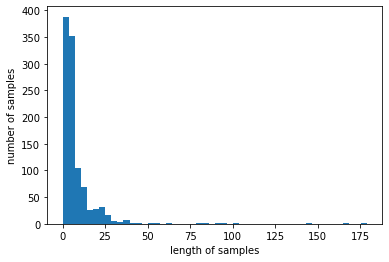

In [82]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [83]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [84]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 98.95138226882746


In [85]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## Bi-LSTM

In [87]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [88]:
model = Sequential()
model.add(Embedding(vocab_size, 500))
model.add(Bidirectional(LSTM(500)))
model.add(Dense(1, activation='sigmoid'))
model.add(Conv2D(50, kernel_size=(50, 500), activation="relu"))
model.add(MaxPool2D(pool_size=(1000 - 50 + 1, 1)))
model.add(Flatten())
model.add(GlobalAvgPool1D())
model.add(Dense(500, activation="sigmoid", use_bias=True))
model.add(Multiply())

In [89]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [90]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=256, validation_split=0.2)

Epoch 1/15
4/4 [==============================] - 89s 18s/step - loss: -126.4794 - acc: 0.2551 - val_loss: -416.3956 - val_acc: 0.0333

Epoch 00001: val_acc improved from -inf to 0.03333, saving model to best_model.h5
Epoch 2/15
4/4 [==============================] - 101s 23s/step - loss: -591.0808 - acc: 0.0501 - val_loss: -640.2222 - val_acc: 0.0333

Epoch 00002: val_acc did not improve from 0.03333
Epoch 3/15
4/4 [==============================] - 98s 22s/step - loss: -800.3483 - acc: 0.0501 - val_loss: -743.8057 - val_acc: 0.0333

Epoch 00003: val_acc did not improve from 0.03333
Epoch 4/15
4/4 [==============================] - 79s 19s/step - loss: -911.5242 - acc: 0.0501 - val_loss: -818.4734 - val_acc: 0.0333

Epoch 00004: val_acc did not improve from 0.03333
Epoch 5/15
4/4 [==============================] - 83s 20s/step - loss: -995.3795 - acc: 0.0501 - val_loss: -880.2635 - val_acc: 0.0333

Epoch 00005: val_acc did not improve from 0.03333
Epoch 6/15
4/4 [=====================

In [ ]:
#테스트 정확도 
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))